In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [56]:
class LinearRegression:
    def __init__(self, X_train, Y_train, X_test, Y_test, alpha=1.0):
        self.X_train = X_train
        self.Y_train = Y_train
        
        self.X_test = X_test
        self.Y_test = Y_test

        self.w = None
        self.alpha = alpha  # Regularization parameter
    
    def fit(self):
        identity_matrix = np.identity(self.X_train.shape[1])
        self.w = np.linalg.inv(self.X_train.T.dot(self.X_train) + self.alpha * identity_matrix).dot(self.X_train.T).dot(self.Y_train)
    
    def predict(self, X):
        return X.dot(self.w)
    
    def accuracy(self, predicted, y):
        return 1 - np.mean(np.abs(predicted - y) / y)
    
    def mse(self, predicted, y):
        return np.mean((predicted - y)**2)

    def rmse(self, predicted, y):
        return np.sqrt(self.mse(predicted, y))

In [57]:
data = pd.read_csv('./data/Real estate.csv')
data.drop('No', axis=1, inplace=True)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [58]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [59]:
labelEconder = LabelEncoder()
oneHotEncoder = OneHotEncoder()
Y = labelEconder.fit_transform(Y)
X = oneHotEncoder.fit_transform(X).toarray()
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)
train_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
linear_regressor = LinearRegression(train_X, train_y, test_X, test_y)
linear_regressor.fit()

In [65]:
predicted = linear_regressor.predict(test_X)
predicted
# rmse = np.sqrt(mse)
r2 = metrics.r2_score(test_y, predicted)
r2

0.6130298256147437

<Axes: >

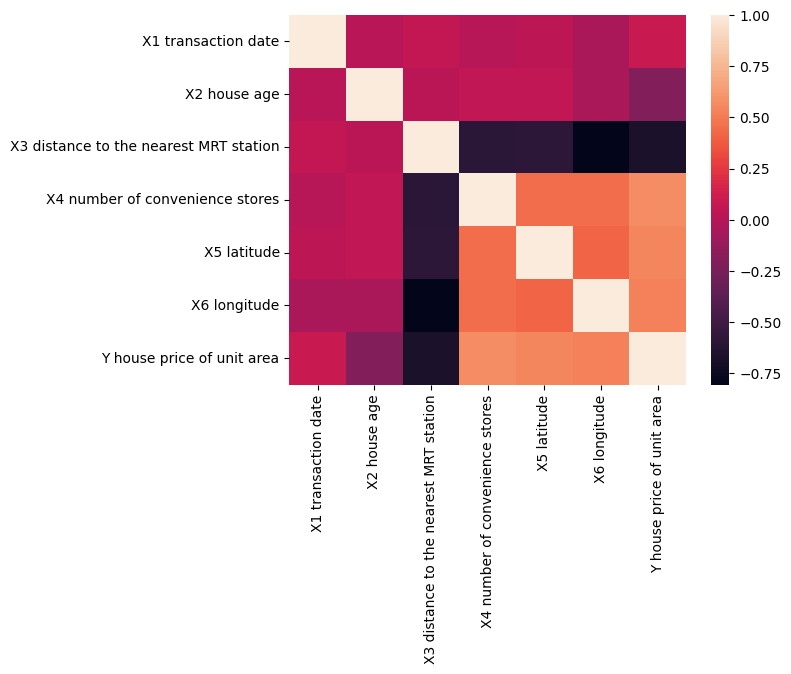

In [67]:
sns.heatmap(data.corr())

(331, 984) (331,)


ValueError: x and y must be the same size

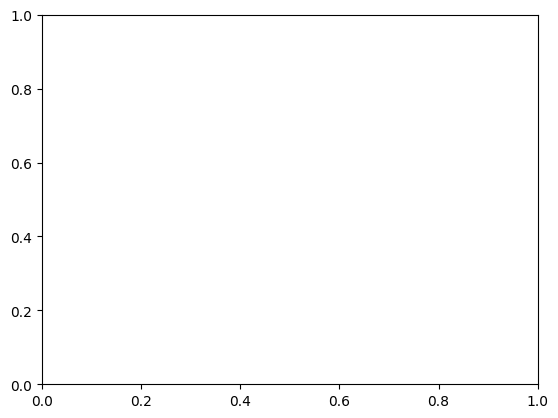

In [66]:
print(train_X.shape, train_y.shape)
plt.scatter(train_X, train_y, color="g")
plt.plot(test_X, predicted, color="k")